## 多分类问题中的混淆矩阵

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=666)
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)
y_predict = log_reg.predict(X_test)

/A/develop/ide/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/A/develop/ide/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [3]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [4]:
precision_score(y_test, y_predict, average="micro")


0.93115438108484

In [5]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[147,   0,   1,   0,   0,   1,   0,   0,   0,   0],
       [  0, 123,   1,   2,   0,   0,   0,   3,   4,  10],
       [  0,   0, 134,   1,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 138,   0,   5,   0,   1,   5,   0],
       [  2,   5,   0,   0, 139,   0,   0,   3,   0,   1],
       [  1,   3,   1,   0,   0, 146,   0,   0,   1,   0],
       [  0,   2,   0,   0,   0,   1, 131,   0,   2,   0],
       [  0,   0,   0,   1,   0,   0,   0, 132,   1,   2],
       [  1,   9,   2,   3,   2,   4,   0,   0, 115,   4],
       [  0,   1,   0,   5,   0,   3,   0,   2,   2, 134]])

In [6]:
cfm = confusion_matrix(y_test,y_predict)

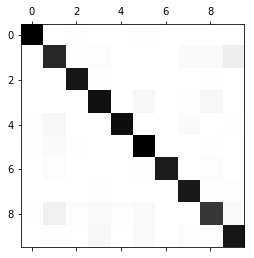

In [15]:
plt.matshow(cfm,cmap=plt.cm.gray_r)
plt.show()

In [17]:
row_sums  = np.sum(cfm,axis=1)
err_matrix = cfm/row_sums
err_matrix

array([[0.98657718, 0.        , 0.00735294, 0.        , 0.        ,
        0.00657895, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.86013986, 0.00735294, 0.01342282, 0.        ,
        0.        , 0.        , 0.02205882, 0.02857143, 0.06802721],
       [0.        , 0.        , 0.98529412, 0.00671141, 0.        ,
        0.        , 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.        , 0.        , 0.9261745 , 0.        ,
        0.03289474, 0.        , 0.00735294, 0.03571429, 0.        ],
       [0.01342282, 0.03496503, 0.        , 0.        , 0.92666667,
        0.        , 0.        , 0.02205882, 0.        , 0.00680272],
       [0.00671141, 0.02097902, 0.00735294, 0.        , 0.        ,
        0.96052632, 0.        , 0.        , 0.00714286, 0.        ],
       [0.        , 0.01398601, 0.        , 0.        , 0.        ,
        0.00657895, 0.96323529, 0.        , 0.01428571, 0.        ],
       [0.        , 0.        , 0.       

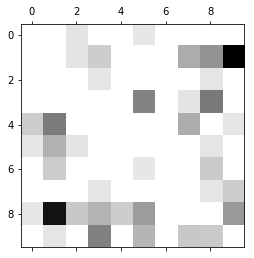

In [19]:
np.fill_diagonal(err_matrix, 0)

plt.matshow(err_matrix, cmap=plt.cm.gray_r)
plt.show()